# COMP30850- Assignment 1
## 183919333 


In [581]:
# Importing of relevant packagages 
import networkx as nx
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import json
%matplotlib inline

## 1. Network construction

In [582]:
#Loading in of Datasets
load_set1=open("18391933-dataset1.json",)
set1_data=json.load(load_set1)
load_set1.close()

load_set2=open("18391933-dataset2.json",)
set2_data=json.load(load_set2)
load_set2.close()

In [583]:
#Adding the JSON datasets to pandas dataframes
set1_df=pd.DataFrame(set1_data)
set2_df=pd.DataFrame(set2_data)

set1_df.head()

,id,name,born,movies
0,000128,Russell Crowe,1964-04-07,"[{'id': '10059518', 'title': 'Unhinged', 'year..."
1,0206257,Rosario Dawson,1979-05-09,"[{'id': '13787320', 'title': 'Rocky Horror Sho..."
2,000905,Roberto Benigni,1952-10-27,"[{'id': '8333746', 'title': 'Pinocchio', 'year..."
3,0001833,Emily Watson,1967-01-14,"[{'id': '10482370', 'title': 'The Third Day', ..."
4,5052065,Ansel Elgort,1994-03-14,"[{'id': '3864056', 'title': 'The Goldfinch', '..."


In [584]:
set2_df.head()

,id,name,born,movies
0,0000538,Colm Meaney,1953-05-30,"[{'id': '13356010', 'title': 'The Monkey', 'ye..."
1,0914455,Leonor Watling,1975-07-28,"[{'id': '10039610', 'title': 'Mi hermano Juan'..."
2,0000932,Halle Berry,1966-08-14,"[{'id': '8310474', 'title': 'Bruised', 'year':..."
3,0000138,Leonardo DiCaprio,1974-11-11,"[{'id': '8690814', 'title': 'Grant', 'year': 2..."
4,0591485,Liza Minnelli,1946-03-12,"[{'id': '10908058', 'title': 'The King of Come..."


In [585]:
#df=pd.concat([set1_df,set2_df])
#df=df.reset_index(drop=True)
#df

In [586]:
#Function to remove unnecessary columns from the datasets
def clean(df):
    del df["id"]
    del df["born"]
    
    
clean(set1_df)
clean(set2_df)

In [587]:
set1_df.head()

,name,movies
0,Russell Crowe,"[{'id': '10059518', 'title': 'Unhinged', 'year..."
1,Rosario Dawson,"[{'id': '13787320', 'title': 'Rocky Horror Sho..."
2,Roberto Benigni,"[{'id': '8333746', 'title': 'Pinocchio', 'year..."
3,Emily Watson,"[{'id': '10482370', 'title': 'The Third Day', ..."
4,Ansel Elgort,"[{'id': '3864056', 'title': 'The Goldfinch', '..."


In [588]:
#Listing the actors by name to use as keys in future dictionarys and nodes
actors1=set1_df["name"]
actors2=set2_df["name"]


In [589]:
#this dictionary will return all the films of a specific actor when you use their name as the key
# in the dictionary
by_actor1={}
i=0
for actor in actors1:
    films=[]                  #The list of films for a given actor
    star=set1_df["movies"][i]
    limit=len(star)
    
    for j in range (0,limit):
        temp=set1_df["movies"][i][j]["title"]
        films.append(temp)
    
    by_actor1[actor]=films     #Filling in our dictionary
    i=i+1
    
 #######################################################################################   
## Repeating the process for the second dataset
by_actor2={}
i=0
for actor in actors2:
    films=[]
    star=set2_df["movies"][i]
    limit=len(star)
    
    for j in range (0,limit):
        temp=set2_df["movies"][i][j]["title"]
        films.append(temp)
    
    by_actor2[actor]=films
    i=i+1
    


In [590]:
g1=nx.Graph()

## Use loops and the intersection function to find those that intersect

    
for i in range (len(actors1)-1):     #Comparing the films of actors to find costars
    list1=by_actor1[actors1[i]]
    for j in range(i+1,len(actors1)):
        list1_asSet=set(list1)
        list2=by_actor1[actors1[j]]
        intersection=list(list1_asSet.intersection(list2))  #list of mutually starred films by the two actors
        
        if intersection:
            g1.add_edge(actors1[i],actors1[j], weight=len(intersection))    
           #edges of actors who co-star in more films will be weighted by the number of mutual films they have   
##########################################################################################
#I have chosen this algorithm to populate my graph, as it assembles weighted edges and ignores
# isolated nodes that are independent of the other nodes (i.e has not co-starred with any actors in the dataset)
##########################################################################################
## Repeating the process for the second dataset
g2=nx.Graph()

    
for i in range (len(actors2)-1):
    list1=by_actor2[actors2[i]]
    for j in range(i+1,len(actors2)):
        list1_asSet=set(list1)
        list2=by_actor2[actors2[j]]
        intersection=list(list1_asSet.intersection(list2))
        
        if intersection:
            g2.add_edge(actors2[i],actors2[j], weight=len(intersection))
            

In [591]:
# Functions for displaying data and graphs of our networks
# Function to print edges 
def showEdges(graph):
    for edge in graph.edges(data=True):
        print(edge)

# Function to print nodes 
def showNodes(graph):
    for node in graph.nodes(data=True):
        print(node)
        
#function to draw our existing graph
def drawGraph(graph):
    plt.figure(figsize=(20,20))
    nx.draw_networkx(graph, with_labels=True, node_size=700, node_color="cyan" )
    plt.axis("off")
    plt.show()
# Function
def networkSizes(graph):
    print("Number of nodes:",graph.number_of_nodes())
    print("Number of edges:",graph.number_of_edges())

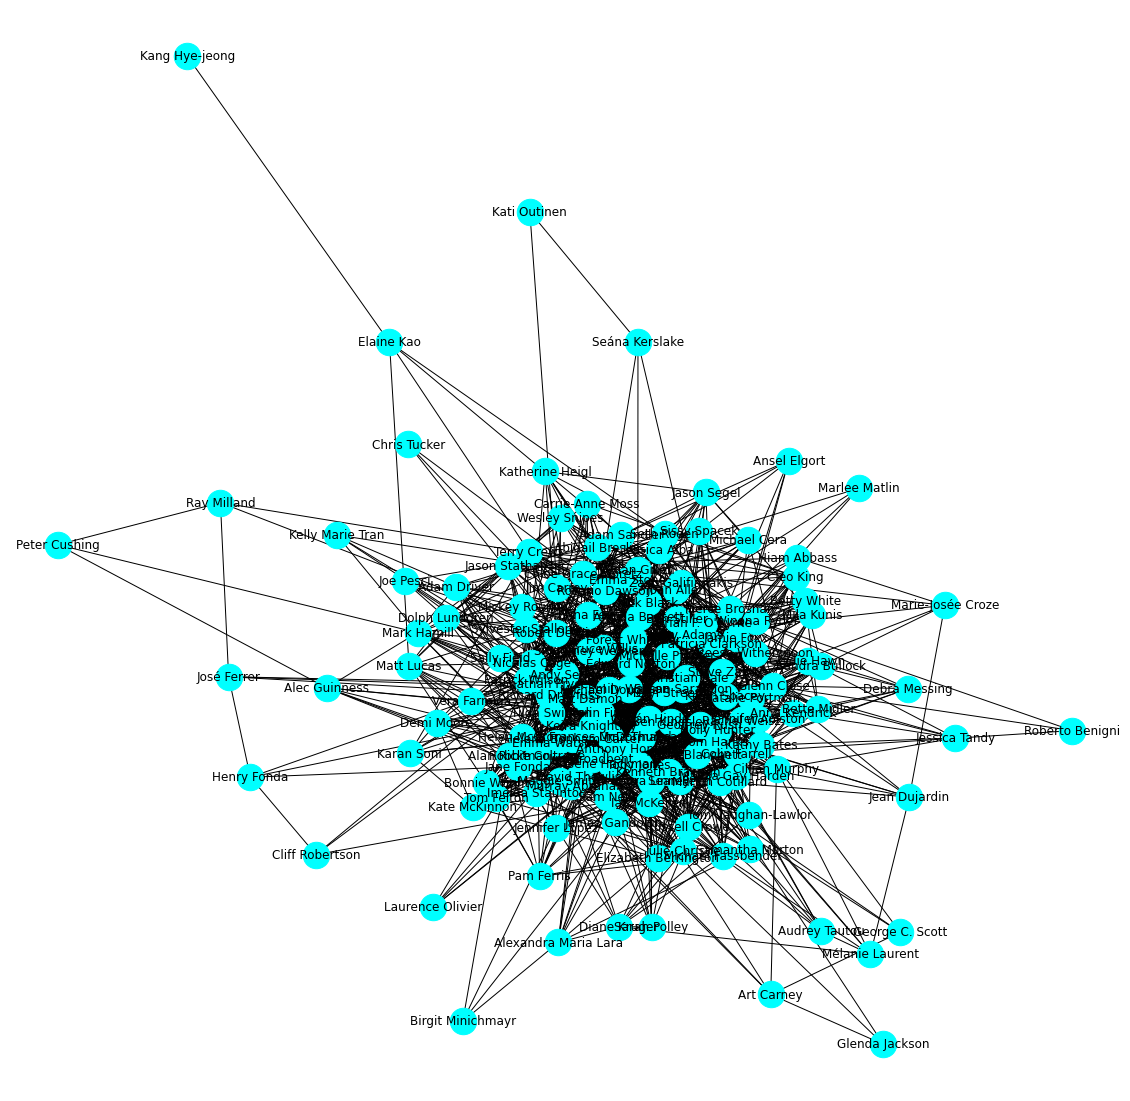

Number of nodes: 148
Number of edges: 1568


In [592]:
drawGraph(g1)
networkSizes(g1)

In [593]:
showEdges(g1)

('Russell Crowe', 'Diane Kruger', {'weight': 1})
('Russell Crowe', 'F. Murray Abraham', {'weight': 1})
('Russell Crowe', 'Toby Jones', {'weight': 1})
('Russell Crowe', 'Christian Bale', {'weight': 1})
('Russell Crowe', 'Helena Bonham Carter', {'weight': 1})
('Russell Crowe', 'Gene Hackman', {'weight': 1})
('Russell Crowe', 'Jane Fonda', {'weight': 1})
('Russell Crowe', 'Cate Blanchett', {'weight': 1})
('Russell Crowe', 'Colin Farrell', {'weight': 1})
('Russell Crowe', 'Ben Kingsley', {'weight': 2})
('Russell Crowe', 'Jim Broadbent', {'weight': 1})
('Russell Crowe', 'Marion Cotillard', {'weight': 1})
('Russell Crowe', 'Amy Adams', {'weight': 1})
('Russell Crowe', 'Kevin Spacey', {'weight': 1})
('Russell Crowe', 'Rachel Weisz', {'weight': 1})
('Russell Crowe', 'Jamie Foxx', {'weight': 1})
('Russell Crowe', 'Susan Sarandon', {'weight': 1})
('Russell Crowe', 'Tilda Swinton', {'weight': 1})
('Russell Crowe', 'Anthony Hopkins', {'weight': 3})
('Russell Crowe', 'Emma Watson', {'weight': 1})
(

('Cillian Murphy', 'Art Carney', {'weight': 1})
('Cillian Murphy', 'Robert De Niro', {'weight': 1})
('Cillian Murphy', 'Andy Serkis', {'weight': 1})
('Cillian Murphy', "Brían F. O'Byrne", {'weight': 2})
('Richard Dreyfuss', 'Michael Douglas', {'weight': 3})
('Richard Dreyfuss', 'Bette Midler', {'weight': 1})
('Richard Dreyfuss', 'James Gandolfini', {'weight': 1})
('Richard Dreyfuss', 'José Ferrer', {'weight': 1})
('Richard Dreyfuss', 'Laura Linney', {'weight': 1})
('Richard Dreyfuss', 'Demi Moore', {'weight': 1})
('Richard Dreyfuss', 'Mila Kunis', {'weight': 1})
('Richard Dreyfuss', 'Matt Lucas', {'weight': 1})
('Richard Dreyfuss', "Brían F. O'Byrne", {'weight': 1})
('Robert De Niro', 'Michael Douglas', {'weight': 1})
('Robert De Niro', 'Angela Bassett', {'weight': 1})
('Robert De Niro', 'Ray Milland', {'weight': 1})
('Robert De Niro', 'Jason Statham', {'weight': 1})
('Robert De Niro', 'Natalie Portman', {'weight': 1})
('Robert De Niro', 'Michelle Pfeiffer', {'weight': 3})
('Robert De 

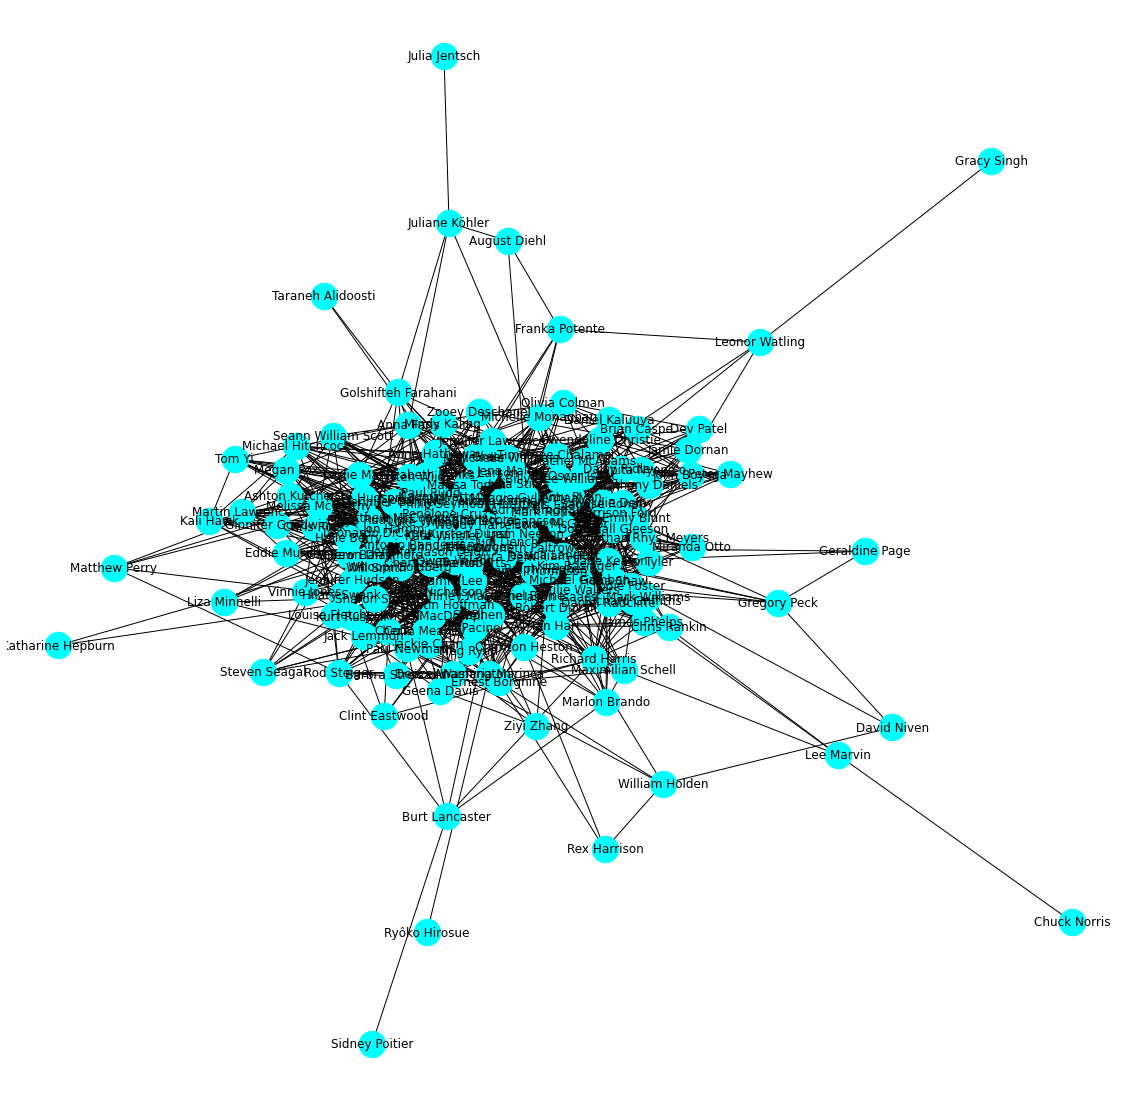

Number of nodes: 162
Number of edges: 1666


In [594]:
drawGraph(g2)
networkSizes(g2)

In [595]:
showEdges(g2)

('Colm Meaney', 'Halle Berry', {'weight': 1})
('Colm Meaney', 'Jason Isaacs', {'weight': 1})
('Colm Meaney', 'Al Pacino', {'weight': 1})
('Colm Meaney', 'Dustin Hoffman', {'weight': 1})
('Colm Meaney', 'Julie Walters', {'weight': 1})
('Colm Meaney', 'Michael Gambon', {'weight': 1})
('Colm Meaney', 'Kali Hawk', {'weight': 1})
('Colm Meaney', 'Owen Wilson', {'weight': 1})
('Colm Meaney', 'Jonah Hill', {'weight': 1})
('Colm Meaney', 'Gabriel Byrne', {'weight': 2})
('Colm Meaney', 'Ian Hart', {'weight': 3})
('Colm Meaney', 'Nicole Kidman', {'weight': 1})
('Colm Meaney', 'William Hurt', {'weight': 1})
('Colm Meaney', 'Ernest Borgnine', {'weight': 1})
('Colm Meaney', 'Woody Harrelson', {'weight': 1})
('Colm Meaney', 'Steven Seagal', {'weight': 1})
('Colm Meaney', 'Whoopi Goldberg', {'weight': 1})
('Colm Meaney', 'Stephen Rea', {'weight': 2})
('Halle Berry', 'Dustin Hoffman', {'weight': 1})
('Halle Berry', 'Penélope Cruz', {'weight': 1})
('Halle Berry', 'Matthew McConaughey', {'weight': 1})
(

## 2. Network characterisation

In [596]:
##Charachterising functions##
def components(graph):
    if nx.is_connected(graph):
        print("The whole network is one component, made up of",nx.number_connected_components(graph),"connected component")
    else:
        print("The network is made up of: ",nx.number_connected_components(graph),"connected components")
        
def networkDensity(graph,name):
    n=graph.number_of_nodes()
    potential_edges=(n*(n-1))/2
    density=graph.number_of_edges()/potential_edges
    print(name,"has a network density of",round(density*100,2),"%")
    
def networkDiameter(graph):
    return nx.diameter(graph)

def meanCluster(graph,name):
    print("The nodes in",name,"have and average clustering coefficient of",round(nx.average_clustering(graph),2))
    

In [597]:
components(g1)

The whole network is one component, made up of 1 connected component


In [598]:
components(g2)

The whole network is one component, made up of 1 connected component


In [599]:
networkDensity(g1,"g1")

g1 has a network density of 14.41 %


In [600]:
networkDensity(g2,"g2")

g2 has a network density of 12.78 %


In [601]:
print("g1 has a network diameter of",networkDiameter(g1))

g1 has a network diameter of 5


In [602]:
print("g2 has a network diameter of",networkDiameter(g2))

g2 has a network diameter of 6


In [603]:
meanCluster(g1,"g1")

The nodes in g1 have and average clustering coefficient of 0.31


In [604]:
meanCluster(g2,"g2")

The nodes in g2 have and average clustering coefficient of 0.29


In [605]:
#Weight distribution#
def createDF(graph):
    weights = {}
    for node1, node2, data in graph.edges(data=True):
        weights[(node1,node2)] = data["weight"]  
    return pd.Series(weights)

In [606]:
#histogram
def histogram(df,heading):
    ax = df.plot.hist(figsize=(11,6), fontsize=14, legend=None, color="darkcyan")
    ax.set_title(heading,fontsize=30, color="k")
    ax.set_ylabel("Number of Edges", fontsize=14)
    ax.set_xlabel("Weight", fontsize=14);
    

In [607]:
g1_weights=createDF(g1)
g1_weights

Russell Crowe  Diane Kruger            1
               F. Murray Abraham       1
               Toby Jones              1
               Christian Bale          1
               Helena Bonham Carter    1
                                      ..
Mark Hamill    Kelly Marie Tran        2
Bette Midler   James Gandolfini        1
Matt Lucas     Elaine Kao              1
Elaine Kao     Kang Hye-jeong          1
Ray Milland    Peter Cushing           1
Length: 1568, dtype: int64

In [608]:
g2_weights=createDF(g2)
g2_weights

Colm Meaney       Halle Berry         1
                  Jason Isaacs        1
                  Al Pacino           1
                  Dustin Hoffman      1
                  Julie Walters       1
                                     ..
Tom Yi            Megan Fox           1
                  Melissa McCarthy    3
Megan Fox         Will Smith          1
                  Melissa McCarthy    1
Melissa McCarthy  Matthew Perry       1
Length: 1666, dtype: int64

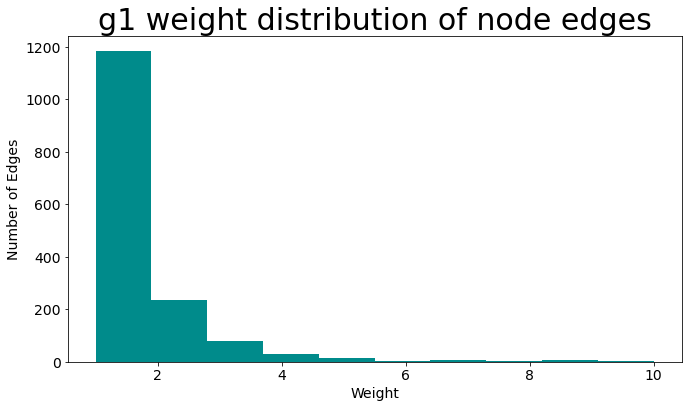

In [609]:
histogram(g1_weights, "g1 weight distribution of node edges")

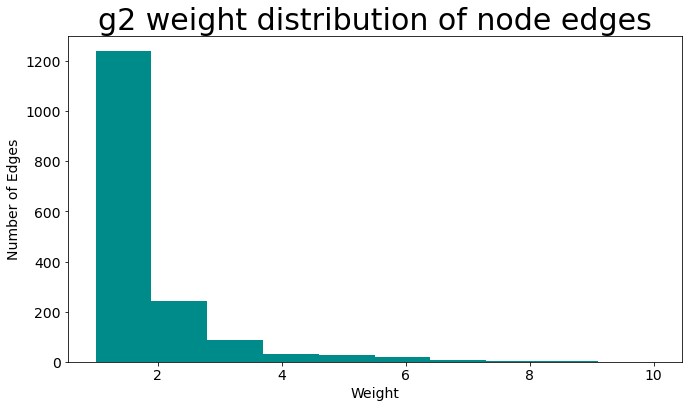

In [610]:
histogram(g2_weights,"g2 weight distribution of node edges")

In [611]:
g1_10_weights=g1_weights.sort_values(ascending=False).head( 10 )
g1_10_weights

Jack Black       Seth Rogen         10
Emma Watson      Robbie Coltrane    10
Robbie Coltrane  Alan Rickman        9
Tom Felton       Robbie Coltrane     9
                 Bonnie Wright       9
Emma Watson      Bonnie Wright       9
Jack Black       Ben Stiller         9
Robbie Coltrane  Bonnie Wright       9
Emma Watson      Tom Felton          9
Tom Felton       Alan Rickman        8
dtype: int64

In [612]:
g2_10_weights=g2_weights.sort_values(ascending=False).head( 10 )
g2_10_weights

Cameron Diaz        Eddie Murphy        10
Daniel Radcliffe    James Phelps         9
Scarlett Johansson  Chris Evans          9
Anthony Daniels     Peter Mayhew         9
Julie Walters       Michael Gambon       8
Harrison Ford       Anthony Daniels      8
Jonah Hill          Kristen Wiig         8
Elizabeth Banks     Paul Rudd            7
Julie Walters       Daniel Radcliffe     7
                    James Phelps         7
dtype: int64

In [613]:
g2_10_weights["Daniel Radcliffe"]

James Phelps    9
dtype: int64

In [614]:
#Node Degrees- function that creates a dataframe of each node and the degrees
def degrees_df(graph):
    degrees = dict( graph.degree() )
    return pd.Series(degrees)

def degreeData(df):
    print('Degree range: [%d, %d]' % (df.min(), df.max() ) )
    print('Mean degree: %.2f' % df.mean() )
    print('Median degree: %d' % df.median() )

def deghistogram(df,heading):
    ax = df.plot.hist(figsize=(11,6), fontsize=14, legend=None, color="darkorange")
    ax.set_title(heading,fontsize=30, color="k")
    ax.set_ylabel("Number of nodes", fontsize=14)
    ax.set_xlabel("Degree", fontsize=14);
    
def centralityData(graph):
    deg = nx.degree_centrality(graph)
    bet = nx.betweenness_centrality(graph, weight="weight")
    eig = nx.eigenvector_centrality(graph, weight="weight")
    close = nx.closeness_centrality(graph)
    s = pd.Series(deg)
    df = pd.DataFrame(s,columns=["degree_centrality"])
    df["weighted betweenness"] = pd.Series(bet)
    df["closeness"] = pd.Series(close)
    df["weighted eigenvector"] = pd.Series(eig)
    return df.sort_values(by="degree_centrality",ascending=False)


In [615]:
degreesg1=degrees_df(g1)
degreesg2=degrees_df(g2)

print(" ________\n|g1 stats|\n|________|")
degreeData(degreesg1)
print(" ________\n|g2 stats|\n|________|")
degreeData(degreesg2)

 ________
|g1 stats|
|________|
Degree range: [1, 58]
Mean degree: 21.19
Median degree: 21
 ________
|g2 stats|
|________|
Degree range: [1, 55]
Mean degree: 20.57
Median degree: 19


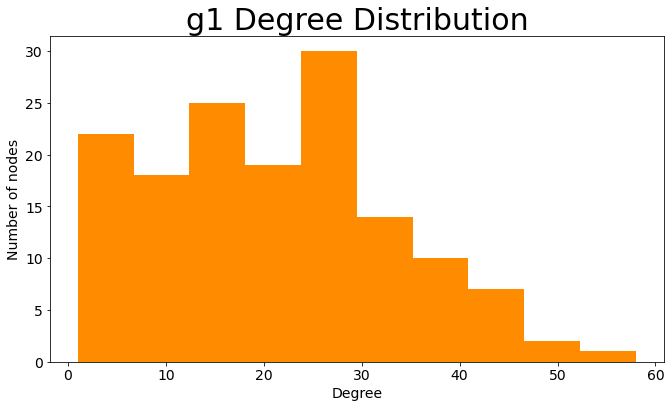

In [616]:
deghistogram(degreesg1, "g1 Degree Distribution")

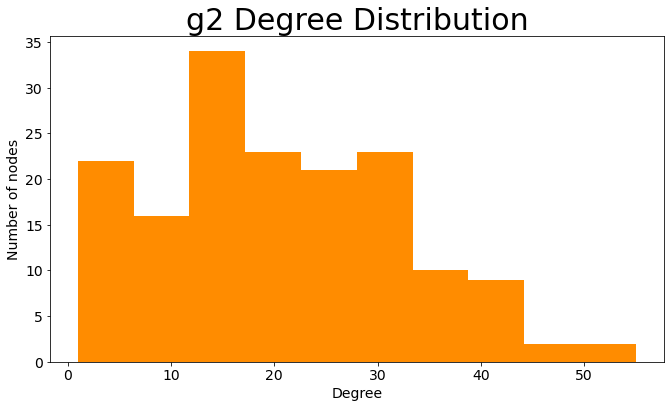

In [617]:
deghistogram(degreesg2, "g2 Degree Distribution")

In [618]:
g1measures=centralityData(g1)
g1measures.head(10)

,degree_centrality,weighted betweenness,closeness,weighted eigenvector
Susan Sarandon,0.394558,0.035401,0.612500,0.068497
Bruce Willis,0.346939,0.038870,0.600000,0.046926
Meryl Streep,0.319728,0.014819,0.583333,0.060343
Anthony Hopkins,0.312925,0.018085,0.581028,0.072159
Robert De Niro,0.312925,0.020128,0.574219,0.055020
Toby Jones,0.292517,0.022201,0.569767,0.133058
David Thewlis,0.292517,0.010871,0.569767,0.252821
Edward Norton,0.292517,0.026758,0.571984,0.037850
Jim Broadbent,0.285714,0.006740,0.567568,0.199987
Ciarán Hinds,0.285714,0.020394,0.567568,0.117010


In [619]:
g1measures.corr()

,degree_centrality,weighted betweenness,closeness,weighted eigenvector
degree_centrality,1.000000,0.803033,0.937215,0.441854
weighted betweenness,0.803033,1.000000,0.717758,0.131027
closeness,0.937215,0.717758,1.000000,0.387501
weighted eigenvector,0.441854,0.131027,0.387501,1.000000


We can see that weighted eigenvector is the lowest correlating 

In [620]:
g1ms=g1measures.sort_values(by="weighted eigenvector",ascending=False).head(10)
g1ms

,degree_centrality,weighted betweenness,closeness,weighted eigenvector
Robbie Coltrane,0.258503,0.008785,0.558935,0.346576
Alan Rickman,0.224490,0.009913,0.548507,0.332171
Emma Watson,0.204082,0.005652,0.534545,0.325770
Tom Felton,0.122449,0.001340,0.478827,0.310970
Bonnie Wright,0.122449,0.000481,0.481967,0.306885
Maggie Smith,0.217687,0.010383,0.534545,0.284778
David Thewlis,0.292517,0.010871,0.569767,0.252821
Helena Bonham Carter,0.258503,0.004782,0.556818,0.244635
Imelda Staunton,0.176871,0.001303,0.523132,0.211901
Jim Broadbent,0.285714,0.006740,0.567568,0.199987


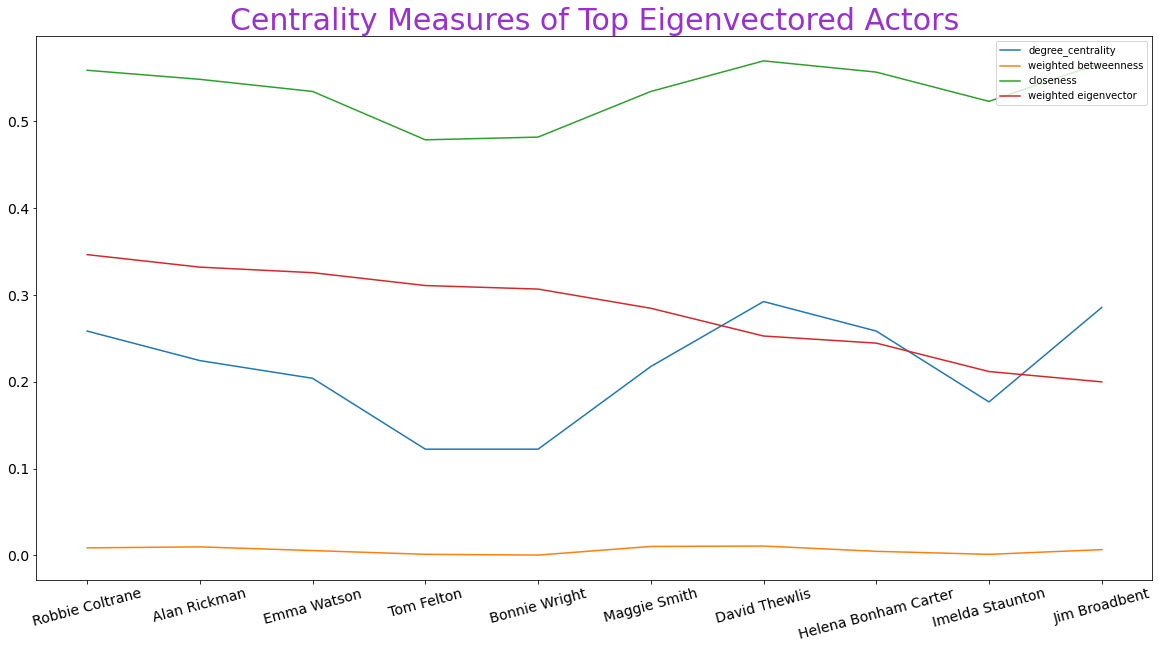

In [621]:
plt.figure(figsize=(20,10))
plt.plot(g1ms)
plt.title("Centrality Measures of Top Eigenvectored Actors", fontsize=30, color="darkorchid")
plt.xticks(rotation=15, fontsize=14)
plt.yticks(fontsize=14)
plt.gca().legend(("degree_centrality","weighted betweenness","closeness","weighted eigenvector"))
plt.show()


In [622]:
degreesg1.sort_values(ascending=False).head(10)

Susan Sarandon     58
Bruce Willis       51
Meryl Streep       47
Anthony Hopkins    46
Robert De Niro     46
Edward Norton      43
Toby Jones         43
David Thewlis      43
Ciarán Hinds       42
Jim Broadbent      42
dtype: int64

In [623]:
g1_10_weights

Jack Black       Seth Rogen         10
Emma Watson      Robbie Coltrane    10
Robbie Coltrane  Alan Rickman        9
Tom Felton       Robbie Coltrane     9
                 Bonnie Wright       9
Emma Watson      Bonnie Wright       9
Jack Black       Ben Stiller         9
Robbie Coltrane  Bonnie Wright       9
Emma Watson      Tom Felton          9
Tom Felton       Alan Rickman        8
dtype: int64

In [624]:
g2measures=centralityData(g2)
g2measures.head(10)

,degree_centrality,weighted betweenness,closeness,weighted eigenvector
Julianne Moore,0.341615,0.033851,0.577061,0.075752
Liam Neeson,0.329193,0.028550,0.575000,0.095171
Paul Rudd,0.291925,0.017007,0.555172,0.069850
Michael Gambon,0.279503,0.013011,0.555172,0.328120
Ralph Fiennes,0.273292,0.010368,0.560976,0.257667
John Lithgow,0.267081,0.027279,0.545763,0.041570
Kirsten Dunst,0.267081,0.026486,0.553265,0.052801
Woody Harrelson,0.260870,0.012870,0.543919,0.064962
Laura Dern,0.260870,0.029785,0.549488,0.044907
Julia Roberts,0.254658,0.020844,0.547619,0.043633


In [625]:
g2measures.corr()

,degree_centrality,weighted betweenness,closeness,weighted eigenvector
degree_centrality,1.000000,0.737860,0.889828,0.396280
weighted betweenness,0.737860,1.000000,0.608004,0.084952
closeness,0.889828,0.608004,1.000000,0.340212
weighted eigenvector,0.396280,0.084952,0.340212,1.000000


In [626]:
g2ms=g2measures.sort_values(by="weighted eigenvector",ascending=False).head(10)
g2ms

,degree_centrality,weighted betweenness,closeness,weighted eigenvector
Michael Gambon,0.279503,0.013011,0.555172,0.328120
Daniel Radcliffe,0.124224,0.000320,0.486405,0.305835
Julie Walters,0.155280,0.003241,0.503125,0.303674
James Phelps,0.080745,0.000000,0.442308,0.302424
Mark Williams,0.111801,0.000406,0.476331,0.293383
Ralph Fiennes,0.273292,0.010368,0.560976,0.257667
Jason Isaacs,0.204969,0.014250,0.524430,0.256884
Fiona Shaw,0.180124,0.005454,0.512739,0.236757
Richard Griffiths,0.142857,0.004900,0.492355,0.236669
Emma Thompson,0.186335,0.004973,0.521036,0.207826


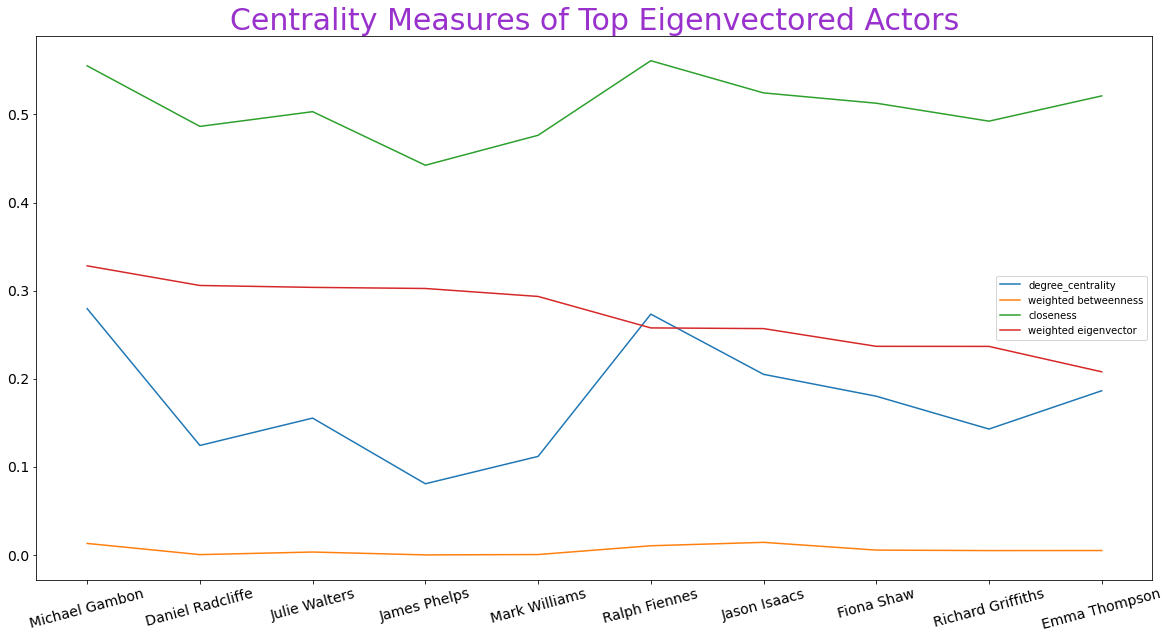

In [627]:
plt.figure(figsize=(20,10))
plt.plot(g2ms)
plt.title("Centrality Measures of Top Eigenvectored Actors", fontsize=30, color="darkorchid")
plt.xticks(rotation=15, fontsize=14)
plt.yticks(fontsize=14)
plt.gca().legend(("degree_centrality","weighted betweenness","closeness","weighted eigenvector"))
plt.show()

In [628]:
degreesg2.sort_values(ascending=False).head(10)

Julianne Moore     55
Liam Neeson        53
Paul Rudd          47
Michael Gambon     45
Ralph Fiennes      44
Kirsten Dunst      43
John Lithgow       43
Laura Dern         42
Woody Harrelson    42
Penélope Cruz      41
dtype: int64

In [629]:
g2_10_weights

Cameron Diaz        Eddie Murphy        10
Daniel Radcliffe    James Phelps         9
Scarlett Johansson  Chris Evans          9
Anthony Daniels     Peter Mayhew         9
Julie Walters       Michael Gambon       8
Harrison Ford       Anthony Daniels      8
Jonah Hill          Kristen Wiig         8
Elizabeth Banks     Paul Rudd            7
Julie Walters       Daniel Radcliffe     7
                    James Phelps         7
dtype: int64

# 3. Ego-centric analysis

In [630]:
g1_ego_node="Robbie Coltrane"
g2_ego_node="Michael Gambon"

In [631]:
eg1 = nx.ego_graph(g1, g1_ego_node)
eg2 = nx.ego_graph(g2, g2_ego_node)

In [713]:
##Egocentric graphs statistics##
def egoStats(eg):
    networkSizes(eg)
    showNodes(eg)

def display_ego(g, ego_node):
    # build the ego network
    eg = nx.ego_graph(g, ego_node)
    # create the figure
    plt.figure(figsize=(20,25))
    plt.margins(0.1, 0.1)
    title = "Ego network for %s (%d nodes)" % (ego_node, eg.number_of_nodes())
    plt.title(title, fontsize=14)
    # lay out all nodes
    pos = nx.spring_layout(g)
    # draw the full network
    nx.draw_networkx(eg, pos, with_labels=True, font_size=12, node_size=900, node_color="paleturquoise", font_color="red",edge_color="gold")
    # draw the ego in red, with larger node size
    nx.draw_networkx_nodes(eg, pos, nodelist=[ego_node], node_size=2500, node_color="darkorange")
    plt.axis("off")
    
def barChart(df, header):
    p = df.plot.bar(figsize=(19, 10), fontsize=14)
    p.set_title(header, fontsize=35, color="darkorchid")
    plt.xticks(rotation=45, fontsize=14)
    #p.set_xlabel('% change from baseline', fontsize=24,color="blue")
    #p.set_ylabel('Months', fontsize=24,color="blue")



In [688]:
print(" _________\n|eg1 stats|\n|_________|")
egoStats(eg1)
print(" _________\n|eg2 stats|\n|_________|")
egoStats(eg2)

 _________
|eg1 stats|
|_________|
Number of nodes: 39
Number of edges: 295
('Sally Field', {})
('Robbie Coltrane', {})
('Emma Watson', {})
('Colin Firth', {})
('Mickey Rourke', {})
('Rachel Weisz', {})
('Natalie Portman', {})
('Mark Hamill', {})
('Tilda Swinton', {})
('Nicolas Cage', {})
('Kenneth Branagh', {})
('Jim Broadbent', {})
('Julie Christie', {})
('Pam Ferris', {})
('Helen McCrory', {})
('Christian Bale', {})
('Toby Jones', {})
('Laura Linney', {})
('Richard Dreyfuss', {})
('Bonnie Wright', {})
('Robert De Niro', {})
('Anthony Hopkins', {})
('Imelda Staunton', {})
('Andy Serkis', {})
('David Thewlis', {})
('Pierce Brosnan', {})
('Alan Rickman', {})
('Bruce Willis', {})
('F. Murray Abraham', {})
('Maggie Smith', {})
('Ciarán Hinds', {})
('Sigourney Weaver', {})
('Uma Thurman', {})
('Matt Damon', {})
('Tom Felton', {})
('Diane Kruger', {})
('Ian McKellen', {})
('Ben Kingsley', {})
('Helena Bonham Carter', {})
 _________
|eg2 stats|
|_________|
Number of nodes: 46
Number of edge

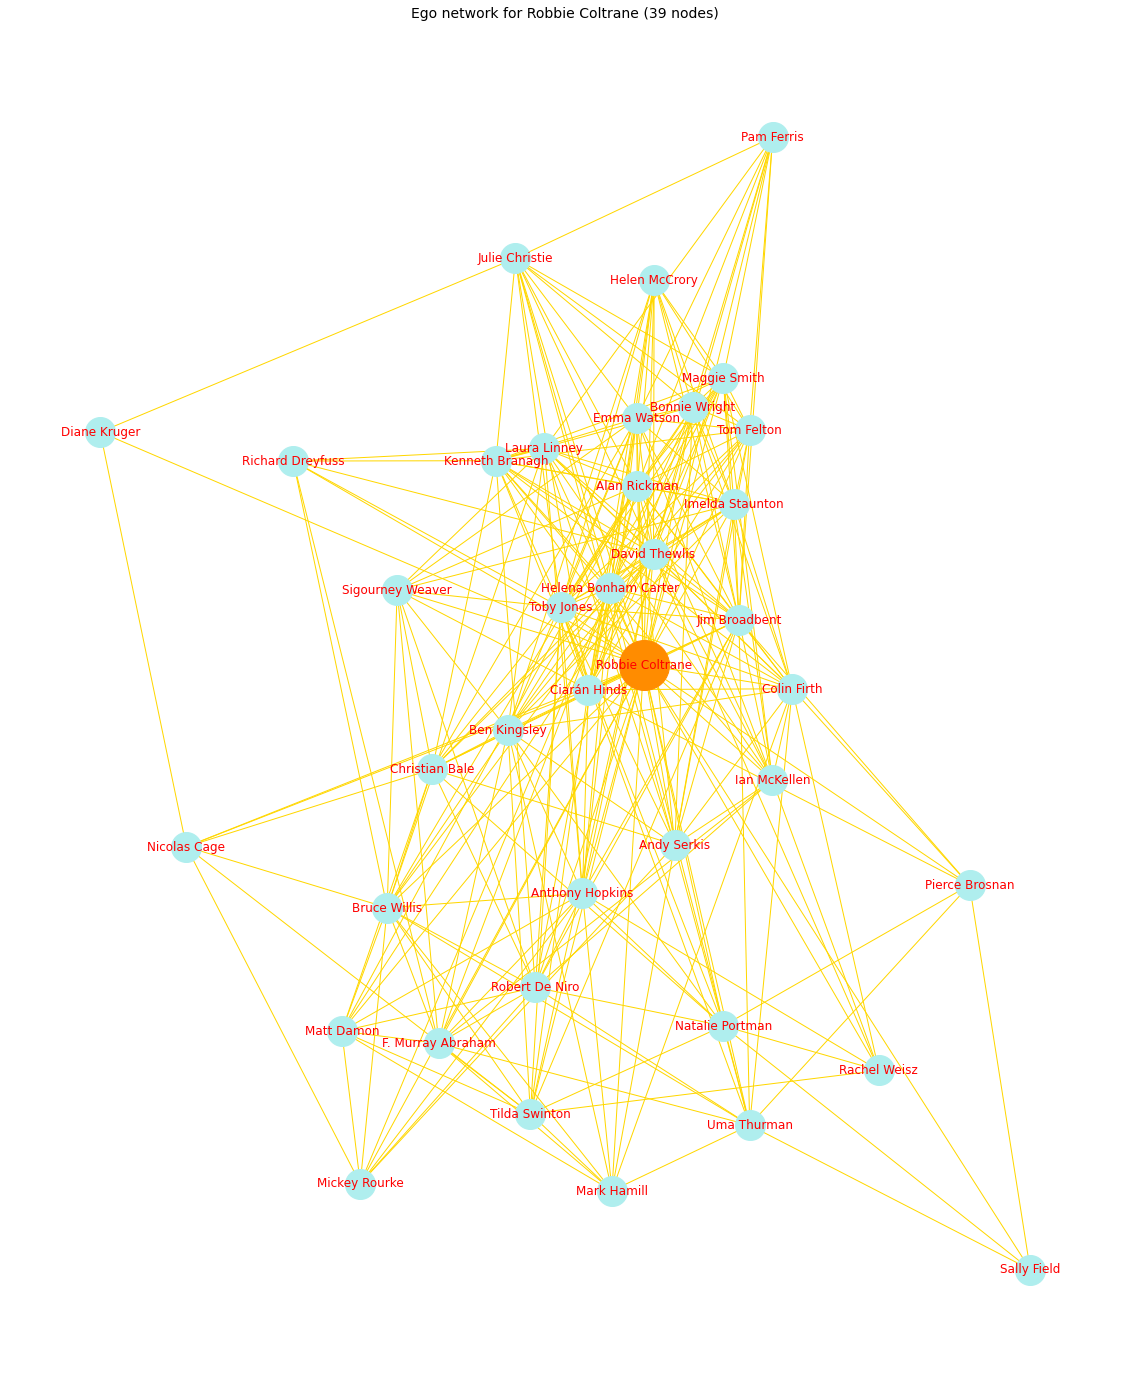

In [689]:
display_ego(eg1,g1_ego_node)

In [715]:
components(eg1)

The whole network is one component, made up of 1 connected component


In [716]:
networkDenisty(eg1,"eg1")

eg1 has a network density of 0.4


In [717]:
networkDiameter(eg1)

2

In [718]:
meanCluster(eg1,"eg1")

The nodes in eg1 have and average clustering coefficient of 0.61


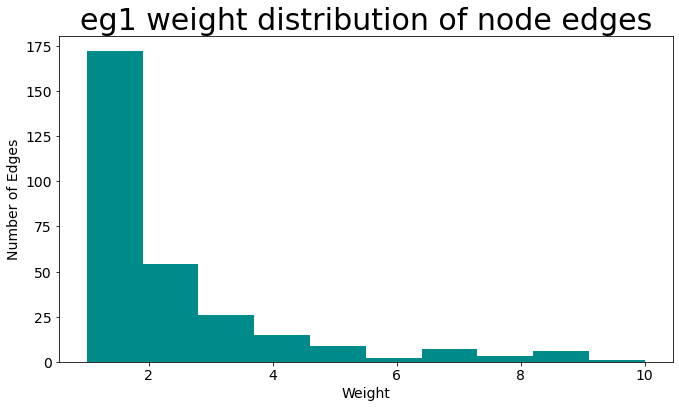

In [719]:
eg1_weights=createDF(eg1)
histogram(eg1_weights,"eg1 weight distribution of node edges")

In [720]:
eg1_10_weights=eg1_weights.sort_values(ascending=False).head(10)
eg1_10_weights

Robbie Coltrane  Emma Watson      10
                 Tom Felton        9
Bonnie Wright    Tom Felton        9
Emma Watson      Tom Felton        9
Robbie Coltrane  Alan Rickman      9
Emma Watson      Bonnie Wright     9
Robbie Coltrane  Bonnie Wright     9
Alan Rickman     Tom Felton        8
Bonnie Wright    Alan Rickman      8
Emma Watson      Alan Rickman      8
dtype: int64

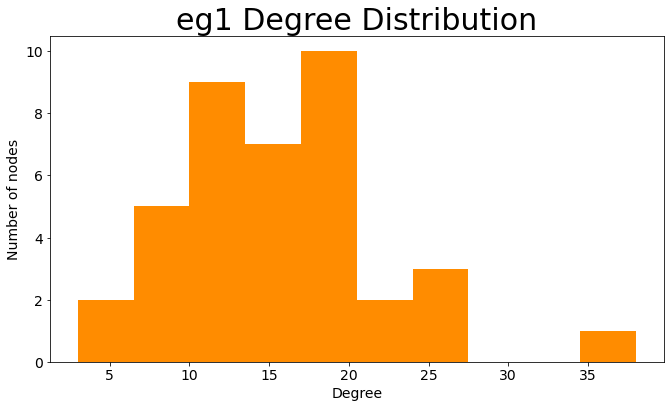

In [721]:
degrees_eg1=degrees_df(eg1)
deghistogram(degrees_eg1,"eg1 Degree Distribution")

In [722]:
eg1deg=degrees_eg1.sort_values(ascending=False).head(10)
eg1deg

Robbie Coltrane         38
David Thewlis           26
Jim Broadbent           24
Toby Jones              24
Helena Bonham Carter    22
Alan Rickman            22
Emma Watson             20
Colin Firth             19
Kenneth Branagh         19
Ciarán Hinds            19
dtype: int64

In [723]:
type(eg1deg)

pandas.core.series.Series

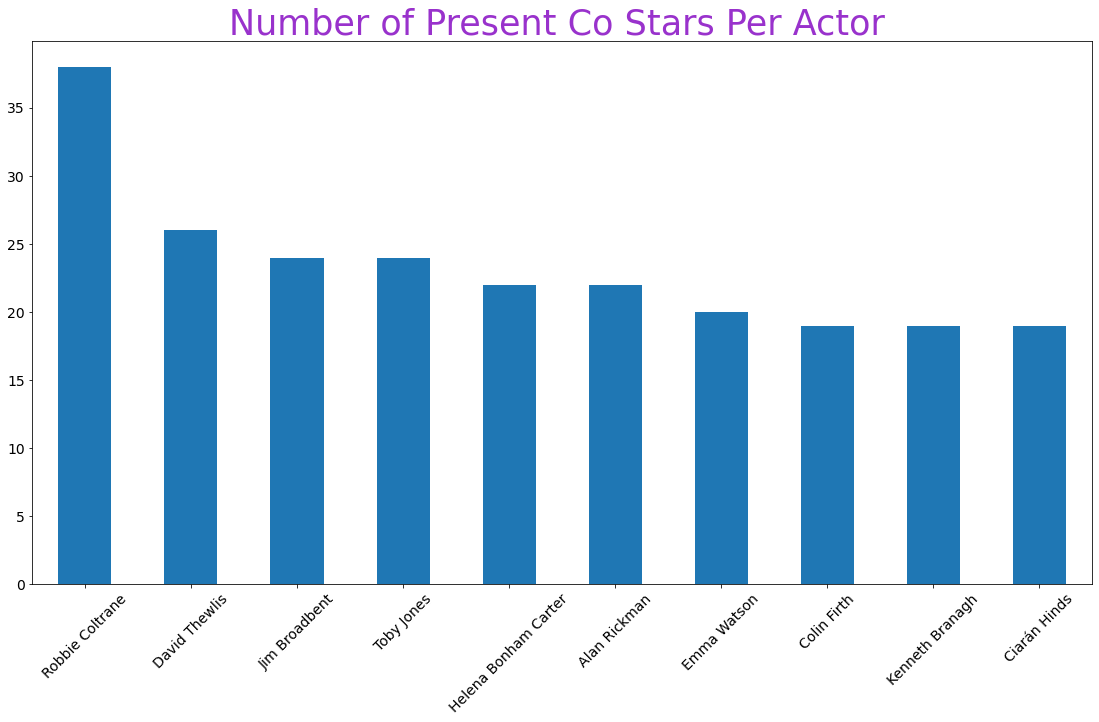

In [724]:
barChart(eg1deg,"Number of Present Co Stars Per Actor ")

# Ego Network 2


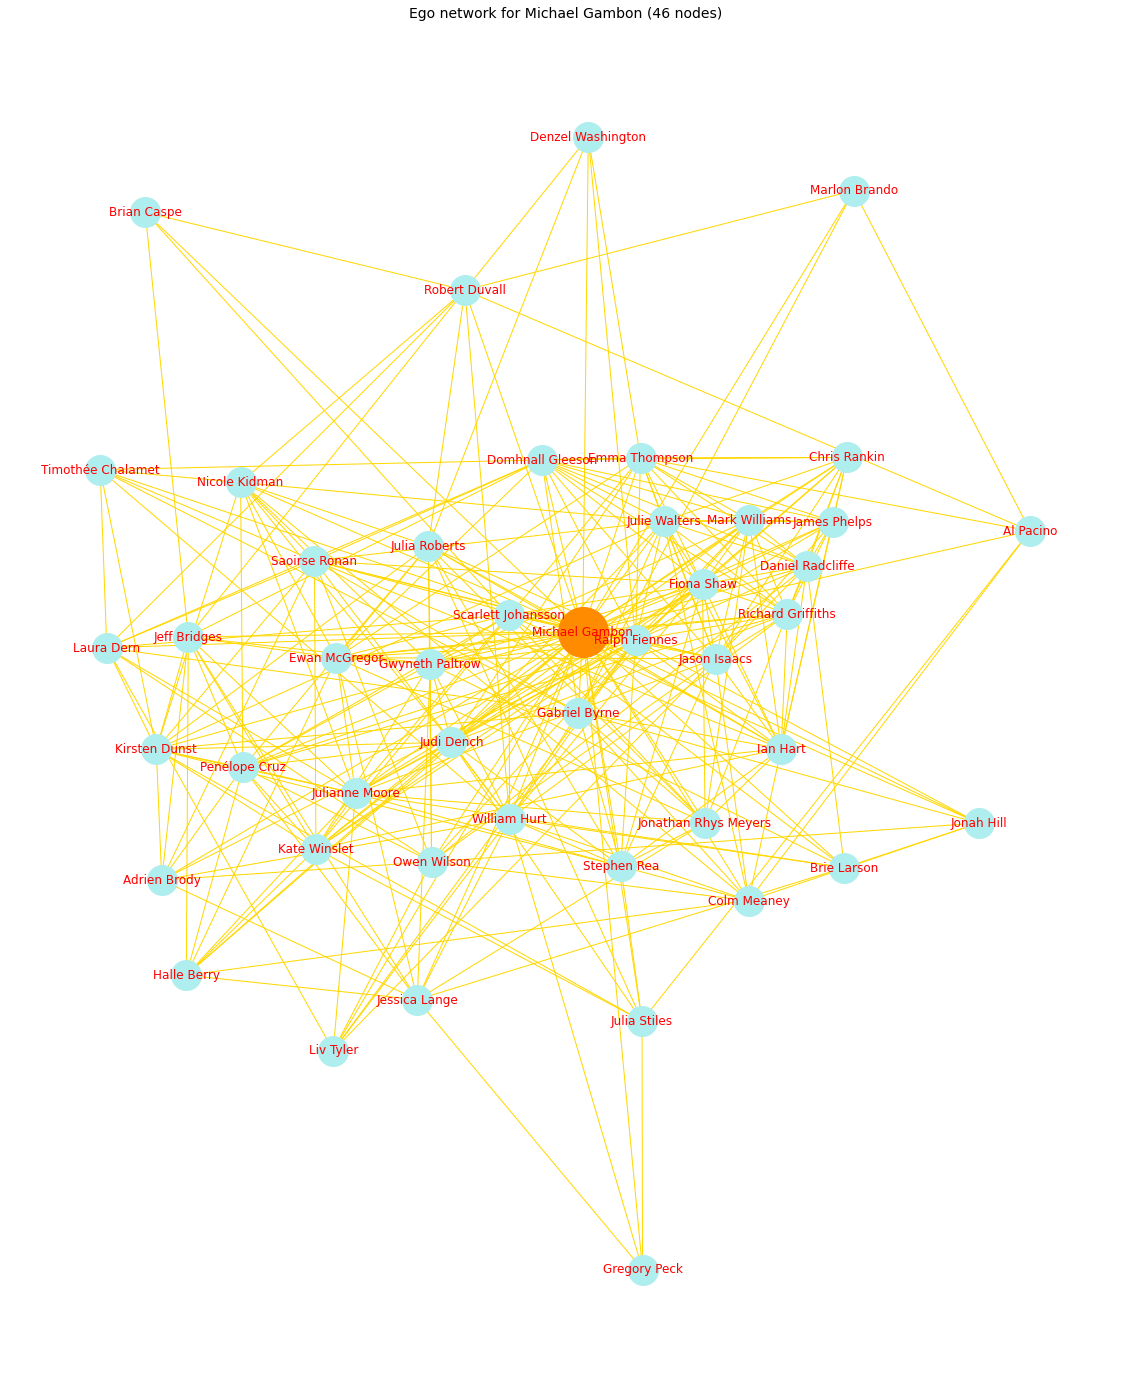

In [725]:
display_ego(eg2,g2_ego_node)